In [1]:
import pandas as pd 
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
p=0.15
 

In [6]:
data = pd.read_csv('E:/FYP-dataset/ddos_balanced/final_dataset.csv',header=0, 
         skiprows=lambda i: i>0 and random.random() > p)

In [7]:
data['Label'].value_counts()

ddos      972463
Benign    950190
Name: Label, dtype: int64

In [8]:
data = data.drop(['Unnamed: 0'], axis=1)

In [9]:
data_real = data.replace(np.inf, np.nan)
df = data_real.dropna(axis=0)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.4.118-203.73.24.75-4510-80-6,192.168.4.118,4510,203.73.24.75,80,6,12/06/2010 08:34:39 AM,966411,6,12,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,192.168.4.118-203.73.24.75-4515-80-6,192.168.4.118,4515,203.73.24.75,80,6,12/06/2010 08:34:46 AM,137,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,192.168.1.103-97.74.144.108-1725-80-6,192.168.1.103,1725,97.74.144.108,80,6,12/06/2010 08:35:28 AM,23221098,47,78,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,192.168.4.118-203.73.24.75-4523-80-6,192.168.4.118,4523,203.73.24.75,80,6,12/06/2010 08:36:33 AM,134,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,192.168.4.118-203.73.24.75-4528-80-6,192.168.4.118,4528,203.73.24.75,80,6,12/06/2010 08:36:41 AM,90,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922648,172.31.66.54-209.85.202.132-50359-443-6,209.85.202.132,443,172.31.66.54,50359,6,20/02/2018 10:48:50,20,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1922649,172.31.66.48-88.247.203.65-445-61621-6,172.31.66.48,445,88.247.203.65,61621,6,20/02/2018 09:32:46,27,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1922650,172.31.65.69-5.39.216.195-3389-47407-6,172.31.65.69,3389,5.39.216.195,47407,6,20/02/2018 01:57:16,83878000,2,0,...,20,0.0,0.0,0.0,0.0,83878000.0,0.0,83878000.0,83878000.0,Benign
1922651,172.31.64.44-201.243.104.174-445-50966-6,201.243.104.174,50966,172.31.64.44,445,6,20/02/2018 04:07:43,616798,5,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [10]:
df_x = df.drop(['Label', 'Timestamp'], axis = 1)
df_y = df['Label']
df_y.unique()

array(['ddos', 'Benign'], dtype=object)

In [11]:
new = []
for i in df_y:
    if i == 'Benign':
        new.append(0)
    else:
        new.append(1)
le = LabelEncoder()
y_train = le.fit_transform(new)

In [14]:
le_fid = LabelEncoder()
le_fid.fit(df_x['Flow ID'])
df_x['Flow ID'] = le_fid.fit_transform(df_x['Flow ID'])

le_sip = LabelEncoder()
le_sip.fit(df_x['Src IP'])
df_x['Src IP'] = le_sip.fit_transform(df_x['Src IP'])

le_dip = LabelEncoder()
le_dip.fit(df_x['Dst IP'])
df_x['Dst IP'] = le_dip.fit_transform(df_x['Dst IP'])
df_x.columns()

TypeError: 'Index' object is not callable

In [9]:
model = ExtraTreesClassifier(random_state=42)
model.fit(df_x, y_train)

ExtraTreesClassifier(random_state=42)

In [10]:
model.feature_importances_

array([9.30607719e-02, 3.07817908e-02, 4.08552174e-02, 3.40640689e-02,
       4.60875323e-02, 4.37091612e-02, 9.83704409e-03, 4.66268950e-03,
       3.57478596e-03, 1.99320163e-03, 1.20024815e-03, 1.65754295e-02,
       4.13682096e-03, 7.82427565e-03, 2.37652891e-02, 8.59741728e-03,
       3.07766015e-03, 3.29347233e-03, 1.31309561e-02, 4.36255292e-04,
       4.53941364e-03, 3.97261311e-03, 1.60841594e-03, 4.98013947e-03,
       4.92011825e-03, 6.85902761e-03, 4.30393060e-03, 2.11634079e-03,
       4.59526433e-03, 3.20838329e-03, 4.16881016e-03, 5.45708241e-03,
       3.70588482e-03, 5.24491941e-03, 6.38396106e-04, 1.24839626e-02,
       1.16067351e-03, 0.00000000e+00, 0.00000000e+00, 4.31710356e-03,
       6.96454167e-03, 4.25300949e-03, 4.27673196e-03, 2.57842108e-03,
       1.37430163e-02, 7.91354010e-03, 1.18724765e-02, 3.39061661e-03,
       5.24399040e-03, 2.55035612e-02, 7.58124220e-03, 3.70422989e-02,
       9.06853172e-02, 8.28680915e-03, 4.42933031e-02, 1.82022683e-02,
      

<AxesSubplot:title={'center':'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

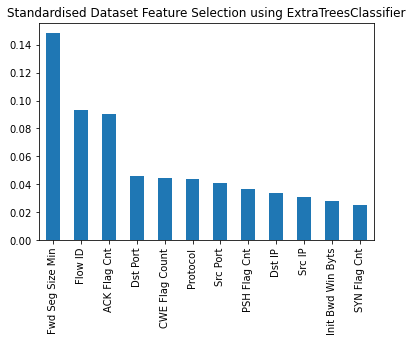

In [11]:
feature_importance_std = pd.Series(model.feature_importances_, index=df_x.columns)
feature_importance_std.nlargest(12).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')


In [16]:
df_x.columns


Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'D

In [17]:
ft=['Fwd Pkt Len Max','Fwd Pkt Len Min','Pkt Len Max','Pkt Len Min','Pkt Size Avg','Fwd Pkts/s','Fwd Header Len','Fwd Seg Size Min','Fwd Pkt Len Std']
x_train = df_x[ft]

In [18]:
x_train.columns = x_train.columns.str.replace(" ", "") 

In [19]:
x_train.columns

Index(['FwdPktLenMax', 'FwdPktLenMin', 'PktLenMax', 'PktLenMin', 'PktSizeAvg',
       'FwdPkts/s', 'FwdHeaderLen', 'FwdSegSizeMin', 'FwdPktLenStd'],
      dtype='object')

In [20]:
pip install keras

You should consider upgrading via the 'c:\users\user\envs\test\scripts\python.exe -m pip install --upgrade pip' command.


In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\envs\test\scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20, random_state = 42)

In [24]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [25]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
x_train_ann, x_val, y_train_ann, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 42)
model = Sequential()
model.add(Dense(8, input_dim=len(ft), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
num_batch = 1000
num_epochs = 40
model.fit(x_train_ann, y_train_ann, batch_size=num_batch, validation_data=[x_val, y_val], epochs = num_epochs, verbose=1)


Epoch 1/40
1226/1226 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8416 - val_loss: 0.1623 - val_accuracy: 0.9313
Epoch 2/40
1226/1226 [==============================] - 3s 2ms/step - loss: 0.2006 - accuracy: 0.9172 - val_loss: 0.1312 - val_accuracy: 0.9555
Epoch 3/40
1226/1226 [==============================] - 3s 2ms/step - loss: 0.1778 - accuracy: 0.9282 - val_loss: 0.1266 - val_accuracy: 0.9561
Epoch 4/40
1226/1226 [==============================] - 3s 2ms/step - loss: 0.1714 - accuracy: 0.9288 - val_loss: 0.1242 - val_accuracy: 0.9562
Epoch 5/40
1226/1226 [==============================] - 3s 2ms/step - loss: 0.1694 - accuracy: 0.9286 - val_loss: 0.1231 - val_accuracy: 0.9560
Epoch 6/40
1226/1226 [==============================] - 3s 2ms/step - loss: 0.1652 - accuracy: 0.9310 - val_loss: 0.1201 - val_accuracy: 0.9563
Epoch 7/40
1226/1226 [==============================] - 3s 3ms/step - loss: 0.1598 - accuracy: 0.9335 - val_loss: 0.1186 - val_accuracy:

In [27]:
model.save("binary_classifier-final-1.h5")

loaded_model = load_model("binary_classifier-final-1.h5")

print(loaded_model.evaluate(x_test,y_test))

11972/11972 [==============================] - 12s 1ms/step - loss: 0.1143 - accuracy: 0.9634
[0.11426740139722824, 0.9634490609169006]


In [28]:
loaded_model = load_model("binary_classifier.h5")



In [29]:
print(loaded_model.evaluate(x_test,y_test))
ann_y_pred = loaded_model.predict(x_test).round().astype('int')
binary = ['Benign','Malicious']
print('Accuracy: ')
print(accuracy_score(y_test, ann_y_pred))
print('Precision: ')
print(precision_score(y_test, ann_y_pred))
print('Recall: ')
print(recall_score(y_test, ann_y_pred))
print('F1: ')
print(f1_score(y_test, ann_y_pred))


ValueError: in user code:

    File "c:\users\user\envs\test\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "c:\users\user\envs\test\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\user\envs\test\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "c:\users\user\envs\test\lib\site-packages\keras\engine\training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "c:\users\user\envs\test\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\user\envs\test\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 15), found shape=(None, 9)


In [30]:
print("\nClassification Report for ANN: \n", classification_report(y_test, ann_y_pred))

cf_matrix_ann = confusion_matrix(y_test, ann_y_pred)
ax = sns.heatmap(cf_matrix_ann, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(binary)
ax.yaxis.set_ticklabels(binary)

plt.show()

NameError: name 'ann_y_pred' is not defined